In [40]:
# data process
import numpy as np 
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# modeling
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble
from xgboost import XGBClassifier
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

# system
import os
import sys

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Python version
print("Python version: {}". format(sys.version))

Python version: 3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) 
[GCC 7.3.0]


In [41]:
# The code was removed by Watson Studio for sharing.

,Invoice ID,Branch,City,Customer type,Gender,Product_line,Unit price,Quantity,Tax5percent,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating,RatingCLass
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,4
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,4
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,3


In [42]:
clean_df = raw_df

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

  
clean_df['Branch'] = le.fit_transform(clean_df['Branch'])
clean_df['Customer type'] = le.fit_transform(clean_df['Customer type'])
clean_df['Gender'] = le.fit_transform(clean_df['Gender'])
clean_df['Product_line'] = le.fit_transform(clean_df['Product_line'])
clean_df['Payment'] = le.fit_transform(clean_df['Payment'])
clean_df.head()

#Cust_Type_Codabse = le.fit_transform(train_df['Customer type'])
#Product_Line_Code = le.fit_transform(train_df['Product_line'])
#Payment_Code = le.fit_transform(train_df['Payment'])

    


,Invoice ID,Branch,City,Customer type,Gender,Product_line,Unit price,Quantity,Tax5percent,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating,RatingCLass
0,750-67-8428,0,Yangon,0,0,3,74.69,7,26.1415,548.9715,1/5/2019,13:08,2,522.83,4.761905,26.1415,9.1,4
1,226-31-3081,2,Naypyitaw,1,0,0,15.28,5,3.8200,80.2200,3/8/2019,10:29,0,76.40,4.761905,3.8200,9.6,4
2,631-41-3108,0,Yangon,1,1,4,46.33,7,16.2155,340.5255,3/3/2019,13:23,1,324.31,4.761905,16.2155,7.4,4
3,123-19-1176,0,Yangon,0,1,3,58.22,8,23.2880,489.0480,1/27/2019,20:33,2,465.76,4.761905,23.2880,8.4,4
4,373-73-7910,0,Yangon,1,1,5,86.31,7,30.2085,634.3785,2/8/2019,10:37,2,604.17,4.761905,30.2085,5.3,3


In [43]:
Target = ['Rating']
columns_to_check = ['Branch','Customer type','Gender','Product_line','Payment']
for x in columns_to_check:
    print(' Correlation by:', x)
    #print(train_df[[x, Target[0]]].groupby(x, as_index=False).mean())
    print(clean_df[[x, Target[0]]].groupby(x, as_index=False).agg(['count', 'mean']))
    print('-'*10, '\n')

 Correlation by: Branch
       Rating          
        count      mean
Branch                 
0         340  7.027059
1         332  6.818072
2         328  7.072866
---------- 

 Correlation by: Customer type
              Rating          
               count      mean
Customer type                 
0                501  6.940319
1                499  7.005210
---------- 

 Correlation by: Gender
       Rating          
        count      mean
Gender                 
0         501  6.964471
1         499  6.980962
---------- 

 Correlation by: Product_line
             Rating          
              count      mean
Product_line                 
0               170  6.924706
1               178  7.029213
2               174  7.113218
3               152  7.003289
4               160  6.837500
5               166  6.916265
---------- 

 Correlation by: Payment
        Rating          
         count      mean
Payment                 
0          344  6.970058
1          311  7.003215


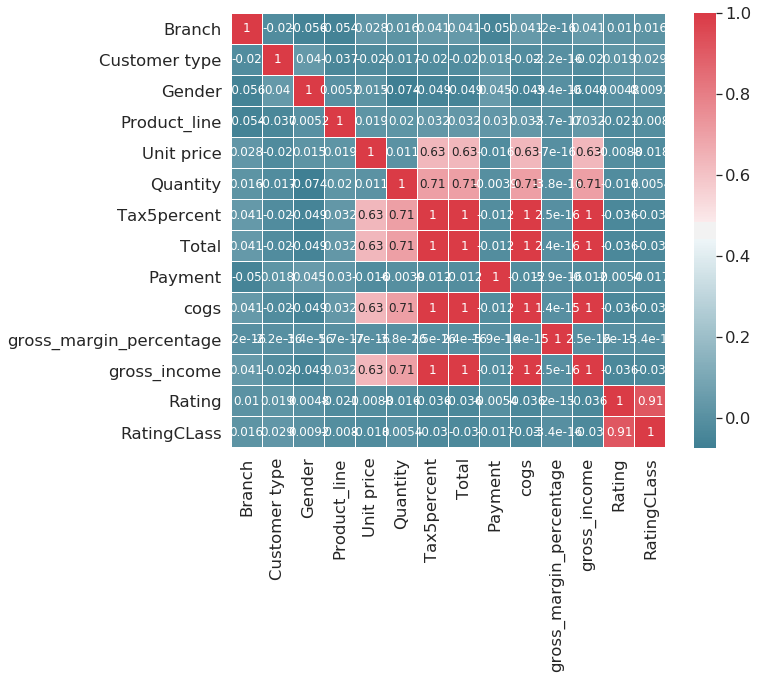

In [44]:
def correlation_heatmap(clean_df):
    _ , ax = plt.subplots(figsize =(10, 8))
    sns.set(font_scale=1.5) 
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        clean_df.corr(), 
        cmap = colormap,
        square=True, 
        #cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    #plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(clean_df)

In summary, no individual atrribute impacts Ratings. Thus, we would like to develop models to predict the ratings based on traits and/or shopping behaviour

In [45]:
Feature = clean_df[['Branch','Customer type','Gender','Product_line','Payment']]
Feature.head()


X = Feature
X[0:5]

y = clean_df['RatingCLass'].values
y[0:5]


array([4, 4, 4, 4, 3])

In [46]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 5) (800,)
Test set: (200, 5) (200,)


# KNN

In [47]:
# Modeling
from sklearn.neighbors import KNeighborsClassifier
k = 3
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [48]:
# Best k
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.405, 0.365, 0.325, 0.43 , 0.375, 0.41 , 0.4  , 0.44 , 0.425,
       0.455, 0.445, 0.435, 0.435, 0.405])

In [49]:
# Building the model again, using k=10
from sklearn.neighbors import KNeighborsClassifier
k = 10
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

# Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
yhat = DT_model.predict(X_test)
yhat

array([4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 4,
       4, 3, 3, 4, 3, 3, 4, 4, 3, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4, 4, 4, 3,
       4, 4, 3, 4, 4, 4, 3, 4, 3, 3, 3, 4, 4, 4, 4, 3, 3, 4, 4, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 4, 4, 3, 4,
       4, 3, 4, 3, 3, 4, 3, 3, 3, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 4, 3, 3, 4, 4, 3, 4, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4,
       3, 3, 4, 4, 3, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4,
       3, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3, 4, 3, 3, 3, 4, 3, 4,
       3, 3])

# Support Vector Machine

In [52]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [53]:
yhat = SVM_model.predict(X_test)
yhat

array([3, 3, 4, 4, 3, 4, 3, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 3, 3, 4, 3,
       4, 3, 3, 4, 3, 4, 4, 4, 3, 4, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 4, 3, 3, 4, 4, 3, 4,
       3, 4, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 4,
       3, 3, 4, 3, 4, 3, 4, 3, 3, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 3,
       3, 4, 4, 3, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 3,
       4, 4, 4, 4, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 4, 4, 4, 3, 3, 4, 4,
       3, 3, 4, 4, 3, 4, 4, 3, 3, 4, 4, 4, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4,
       3, 4, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 4, 4, 4, 4, 4, 3, 4,
       3, 3])

# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
yhat = LR_model.predict(X_test)
yhat

array([3, 3, 4, 3, 4, 4, 4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 4, 3, 3, 4, 4, 4,
       3, 4, 4, 4, 3, 3, 3, 3, 3, 4, 4, 3, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4,
       4, 4, 3, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       3, 4, 4, 3, 4, 3, 4, 4, 3, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 3, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3, 3, 4, 3, 3, 3, 4,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 3, 3, 4, 4, 3, 4, 4, 4,
       4, 3, 4, 4, 3, 4, 3, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4,
       4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3,
       4, 3])

# Model Evaluation using Test set

In [57]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [61]:

body = client_d35ada070f334ac79c6386e008aed3ff.get_object(Bucket='courseracapstone-donotdelete-pr-btievra4mwysqt',Key='Copy of supermarket_sales - Sheet1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_test = pd.read_csv(body)
df_test.head()

df_test['Branch'] = le.fit_transform(df_test['Branch'])
df_test['Customer type'] = le.fit_transform(df_test['Customer type'])
df_test['Gender'] = le.fit_transform(df_test['Gender'])
df_test['Product_line'] = le.fit_transform(df_test['Product_line'])
df_test['Payment'] = le.fit_transform(df_test['Payment'])
df_test.head()


test_Feature = df_test[['Branch','Customer type','Gender','Product_line','Payment']]
test_X = preprocessing.StandardScaler().fit(test_Feature).transform(test_Feature)
test_X[0:5]


array([[-1.20897001e+00, -9.98001996e-01, -9.98001996e-01,
         3.19616615e-01,  1.20352798e+00],
       [ 1.23833770e+00,  1.00200200e+00, -9.98001996e-01,
        -1.43010938e+00, -1.20593745e+00],
       [-1.20897001e+00,  1.00200200e+00,  1.00200200e+00,
         9.02858613e-01, -1.20473272e-03],
       [-1.20897001e+00, -9.98001996e-01,  1.00200200e+00,
         3.19616615e-01,  1.20352798e+00],
       [-1.20897001e+00,  1.00200200e+00,  1.00200200e+00,
         1.48610061e+00,  1.20352798e+00]])

In [63]:
test_y = df_test['RatingCLass'].values
test_y[0:5]

array([4, 4, 4, 4, 3])

In [64]:
knn_yhat = kNN_model.predict(test_X)
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(test_y, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(test_y, knn_yhat, average='weighted') )

KNN Jaccard index: 0.43
KNN F1-score: 0.39


In [65]:
DT_yhat = DT_model.predict(test_X)
print("DT Jaccard index: %.2f" % jaccard_similarity_score(test_y, DT_yhat))
print("DT F1-score: %.2f" % f1_score(test_y, DT_yhat, average='weighted') )

DT Jaccard index: 0.42
DT F1-score: 0.38


In [66]:
SVM_yhat = SVM_model.predict(test_X)
print("SVM Jaccard index: %.2f" % jaccard_similarity_score(test_y, SVM_yhat))
print("SVM F1-score: %.2f" % f1_score(test_y, SVM_yhat, average='weighted') )

SVM Jaccard index: 0.43
SVM F1-score: 0.39


In [67]:
LR_yhat = LR_model.predict(test_X)
LR_yhat_prob = LR_model.predict_proba(test_X)
print("LR Jaccard index: %.2f" % jaccard_similarity_score(test_y, LR_yhat))
print("LR F1-score: %.2f" % f1_score(test_y, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(test_y, LR_yhat_prob))

LR Jaccard index: 0.41
LR F1-score: 0.41
LR LogLoss: 1.07


----